
# Обучене нейронной сети в Keras (Часть 2)

## Функции потерь, Схемы инициализации

## Содержание занятия

##### Нейронная сеть в задачах классификации
- Специфика обучения;
- Xgboost vs ANN;
- Как не попасть в яму локального минимума; 

##### Анализ скрипта обучения нейронной сети в Keras:
- Анализ скрипта в задачах классификации
- Завершение обучения и подготовка к production

Теория:
##### Основные модели Loss-функции и их специфика 
- Описание Loss-функций функций: MSE, MAE, MAPE, MSLE, Петля Loss, logcosh, categorical_crossentropy, Расстояние Кульбака - Лейблера, cosine_proximity;
- Область применения Loss-функций в задачах машинного обучения

##### Схемы Инициализация обучения нейронной сети:
- Общая модель инициализации значений исходных параметров; 
- Инициализация свободного члена;
- Схемы инициализация основного вектора;
- Общие рекоммендации к выработке схем инициализации.

Практика:
- Алгоритм управления процессом оптимизации; 
- Алгоритм управления процессом инициализации;

##### Путь к рабочей папке: C:\\Users\\User\ML_git\NeuralNetworks_Keras_3

## Обучене нейронной сети в Keras (Практикум 2) продолжение...

##### Нейронная сеть: специфика обучения

На Практикуме прошлого занятия мы провели пробное обучение нейронной сети прямого распространения, результаты которого были достаточно высокими. Однако в реальной практики для того, чтобы достич хорошего показателя точности, процессы обучения нужно повторять порой несколько десятков раз: Одна из особенностей нейронной сети в отличии, скажем от ```Xgboost``` (один раз нажал, получил результат и с ним работаешь) в нейронной сети есть чувствительность к локальному минимому. Т.е. элемент случайности в обучении нейронной сети, как бы мы не улучшали градиентный спуск, все-таки присутствует. 

Однако упорность в достижении более высокой метрики качества в конечном итоге всегда приносит результат: разница в десятые доли процентов на выходе существенно улучшает эффективность модели применительно к решениям бизнес задач. Математически это объяснить достаточно просто. Разница в доле процентов, помноженная на количество получаемых бенефитов ощитимо влияет уже на эффективность бизнес-процесса, в котором применяется данная нейросеть. 

#### Анализ скрипта (прожолжение)

In [3]:
import numpy as np # библиотека нужна для работы с массивами данных в формате array
import pandas as pd # библиотека нужна для анлаза данных в формате df
import matplotlib # На всякий случай
import matplotlib.pyplot as plt

In [4]:
import os # Задаем рабочую папку с данными
os.chdir ("C:\\Users\\User\ML_git\\NeuralNetworks_Keras_3\Datasets_ANN_FF_Keras")
from IPython.display import Image

Комментарии:_Для каждой модели всегда лучше иметь отдельную папку. Практика показывает, что при большом количестве моделей (их может быть более 50) эффективнее применять 1 папка = 1 модель

In [5]:
from tensorflow import keras # Сама оболочка 
from keras.models import Sequential # Модуль архитектуры нейронной сети прямого распространения
from tensorflow.keras.layers import Dense # Модуль описания слоев полносвязной нейронной сети 
from keras.utils import np_utils # Модуль подготовки данных

Комментарии:_Мы используем полносвязную модель нейронной сети класса FF: архитектура остается неизменной

In [6]:
df = pd.read_csv('Wine.txt', sep='\t', header=0)
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [7]:
y = df['Desired1(3)'] # Задаем отклик по названию столбца
x = df.drop('Desired1(3)', axis=1) # ... а все оставшиеся столбцы соответственно будут предикторами

In [8]:
from sklearn.model_selection import train_test_split #подгружаем модуль расщепления
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12345, 
                                                   # задаем долю тестовой выборки
                                                   test_size = 0.33)

Комментарии:_Для проверки качества будет достаточно тестовой выборки. У нас не такой большой объем данных, чтобы расходовать его на  выборку валидации

In [9]:
# Преобразуем таблицы pandas в объекты numpy array:
x_train = x_train.values # Предикторы основной выборки
x_test = x_test.values # Предикторы тестовой выборки
y_train = y_train.values # Отклики основной выборки
y_test = y_test.values # Отклики тестовой выборки

Комментарии:_Разница в том, что разработчики TF, на фундаменте которого написан Keras, допускают только формат np array для обучения нейронной сети

In [10]:
y_train_bin = np_utils.to_categorical(y_train)
y_test_bin = np_utils.to_categorical(y_test)

Комментарии:_Проводим стандартизацию: столбец с откликами (классы вина), в котором 0 или 1 или 2 -> три столбца. Каждый столбеуц теперь это класс, а принадлежность к классу выражена в виде 0 (НЕ принадлежит этому классу) и 1 (принадлежит этому классу)

In [11]:
y_train_bin[0:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [12]:
# Создаем модель: слои (активация нейронов и стандартизация данных)
model = Sequential() # Шаблон модели FF
model.add(Dense(9, input_dim=13, activation='relu')) # Описание входного слоя: 13 нейронов + функция активации нейронов входного слоя
model.add(Dense(10, activation='relu',)) # Описание скрытого слоя: 10 нейронов + функция активации нейронов скрытого слоя
model.add(Dense(3, activation='softmax')) # Описание выходного слоя: 3 нейрона + метод преобразования выходных значений

Комментарии:_Sequential = это простейшая модель нейронной сети класса FF, в которой по умолчанию нпараметры заданы случайным образом. Функция model.add надстраивает каждый последующий слой, функция Dense дает его описание как полносвязного (нейроны связаны каждый с каждым). У нас получается сеть с двумя скрытыми слоями по 9 и 10 нейронов, на которые подается 13 предикторов, на выходе имеем 3 нейрона. В предшествующем куске кода мы подготовили данные так, чтобы кол-во выходных колонок соответствовало количеству нейронов выходного слоя.  

In [13]:
# Сращиваем модель с параметрами: "движок"
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # функция потерь + улучшатель спуска + метрика

Комментарии:_optimizer = Метод улучшения скорейшего градиентного спуска. На прошлом занятии мы изучили метод...

In [14]:
# Обучаем модель:
model.fit(x_train, y_train_bin, epochs=300, batch_size=10) # количество эпох + размер 

Epoch 1/300
12/12 [==============================] - 1s 3ms/step - loss: 213.0307 - accuracy: 0.4118
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 184.9739 - accuracy: 0.4118
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 159.8720 - accuracy: 0.4118
Epoch 4/300
12/12 [==============================] - 0s 5ms/step - loss: 136.7699 - accuracy: 0.4118
Epoch 5/300
12/12 [==============================] - 0s 6ms/step - loss: 117.4233 - accuracy: 0.4118
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 99.4549 - accuracy: 0.4118
Epoch 7/300
12/12 [==============================] - 0s 5ms/step - loss: 84.0755 - accuracy: 0.4118
Epoch 8/300
12/12 [==============================] - 0s 4ms/step - loss: 70.6088 - accuracy: 0.4118
Epoch 9/300
12/12 [==============================] - 0s 3ms/step - loss: 58.1383 - accuracy: 0.4118
Epoch 10/300
12/12 [==============================] - 0s 5ms/step - loss: 46.9191 - accuracy: 0

12/12 [==============================] - 0s 4ms/step - loss: 0.2774 - accuracy: 0.9076
Epoch 164/300
12/12 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 0.9076
Epoch 165/300
12/12 [==============================] - 0s 3ms/step - loss: 0.2806 - accuracy: 0.9160
Epoch 166/300
12/12 [==============================] - 0s 3ms/step - loss: 0.2937 - accuracy: 0.8992
Epoch 167/300
12/12 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.8739
Epoch 168/300
12/12 [==============================] - 0s 4ms/step - loss: 0.2770 - accuracy: 0.8992
Epoch 169/300
12/12 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.9076
Epoch 170/300
12/12 [==============================] - 0s 4ms/step - loss: 0.3058 - accuracy: 0.8824
Epoch 171/300
12/12 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.9160
Epoch 172/300
12/12 [==============================] - 0s 3ms/step - loss: 0.2671 - accuracy: 0.9244
Epoc

In [15]:
scores = model.evaluate(x_test, y_test_bin)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 4ms/step - loss: 0.5590 - accuracy: 0.8475

Accuracy: 84.75%


#### Анализ скрипта (завершение)

##### Подготавливаем полученную модель 

In [17]:
# задаем предикторы
predictions = model.predict(x_test) # команда, которая берет набор данных, который потребуется для дальнейшего решения задачи (распознать сорт вина) 

2/2 [==============================] - 0s 3ms/step


Комментарии:_Командой```model.predict``` можем брать любую заранее отмаркированную часть выборки...

In [18]:
# проверяем значения первых 5 строк
print(predictions[0:5])

[[5.1383521e-02 2.2525160e-04 9.4839126e-01]
 [2.1121010e-01 2.4971436e-01 5.3907549e-01]
 [6.2790990e-04 9.9931145e-01 6.0658829e-05]
 [9.7483647e-01 4.7355480e-03 2.0428004e-02]
 [2.6447403e-03 9.6946400e-01 2.7891288e-02]]


Комментарии:_Очевидно, что первые пять бутылок вина принадлежат к классу 2

-------------------------------------

## Функция потерь и Инициализация (Теория)

#### Индикаторы нейронной сети

Если обратное распространение ошибки, метод скорейшего спуска и его оптимизаторы = "двигатель" обучения нейронной сети, то кластер Инициализация, функция потерь и метрики качества = "мозги"  

Функция потерь является параметром, который непосредственно связан с качеством модели. Минимизация функции потерь обеспечивает оптимальный подбор весов в ходе обучения, который выражается в метрике качества (например Accuracy), одновременноя являясь признаком качества. 
А процесс Инициализации (начало в предыдущем занятии) задает начальные значения весов 

In [24]:
os.chdir ("C:\\Users\\User\ML_git\\NeuralNetworks_Keras_3")
from IPython.display import Image

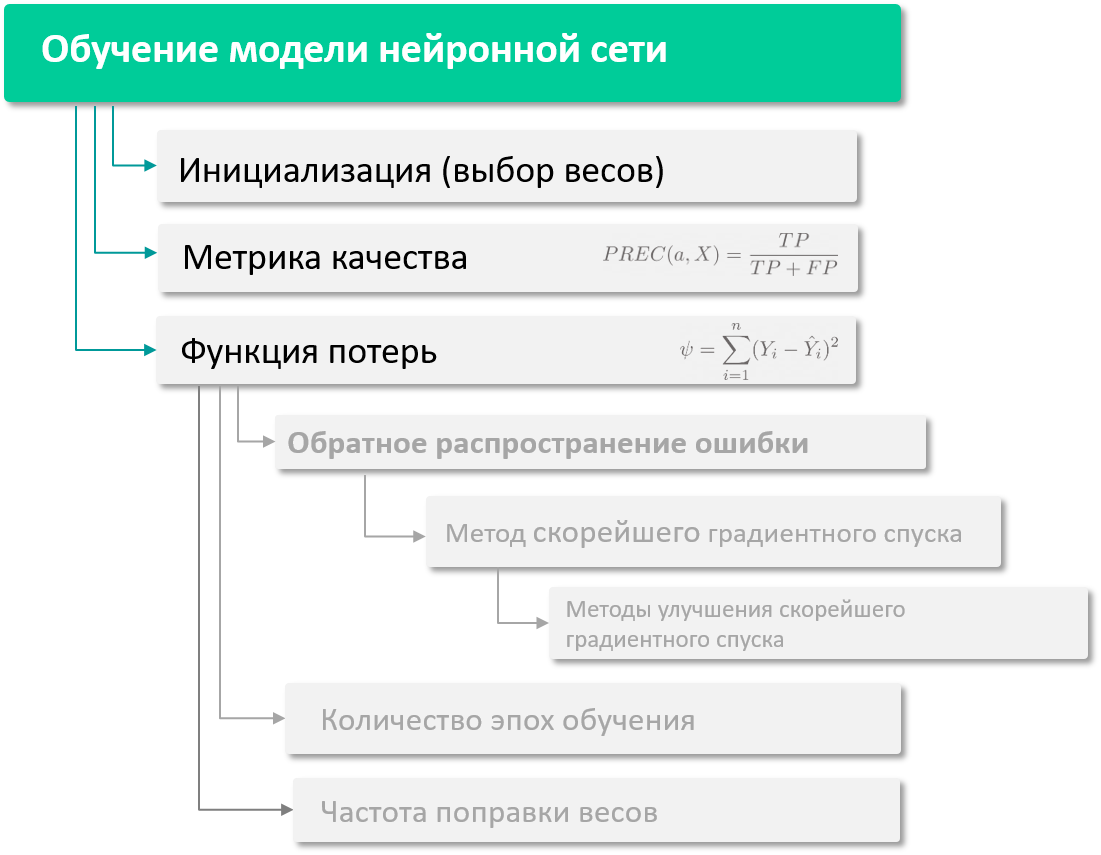

In [25]:
Image('ANN_ModellingFiting_Diagramm_2.png')

### Основные модели Loss-функций (функции потерь) и их специфика 

Прежде, чем перейти к описанию функций потерь (для удобства и запоминаемости будем называть ее ```loss``` функция), введем важные обозначения. У нас поменялись роли предикторов. Если ранее предикторами назывались входные данные $ x $, то теперь роль предикторами будут назваться находимые значения $ \hat{y} $: 

- $ y = $ y_true 
- $ \hat{y} $ = y_predict

В качестве обозначения функции потерь будем использовать $ \psi $

In [28]:
from keras import losses
model.compile(loss=losses.mean_squared_error, optimizer='sgd')

##### Сумма квадратов ошибок ```mean_squared_error``` MSE

$$ \psi = \frac{1}{n}\sum_{1}^n (y_{i} - \hat{y}_{i})^2 $$

##### Сумма модулей ошибок ```mean_absolute_error``` MAE

$$ \psi = \frac{1}{n}\sum_{1}^n |y_{i} - \hat{y}_{i}| $$

Ключевая разница двух функций - их восприимчивость к большим ошибкам. Если в выборке присутствует значительная доля аномалий и выбросов, то разница, возведенная в квадрат сделает ошибку свервысокойой. ```mean_squared_error``` более чувствительная функция к выбросам, поэтому в этом рекоммендуется ```mean_absolute_error```
Иначе, когда выборка однородна и с нормальным распределением более чувствительная ```mean_squared_error``` более информативна.

##### Сумма долей модулей ошибок ```mean_absolute_percentage_error``` MAPE

$$ \psi = \frac{1}{n}\sum_{1}^n \frac{|y_{i} - \hat{y}_{i}|}{\max(|y_{i}|,\epsilon)} * 100  $$

Функция достаточно хороша в прогнозировании, а также в выборке с сверхбольшим объемом данных. Например, если разница ошибки исчисляется в млн, по отношении к млрд.) В этом случае ошибка, выраженная в процентном отношении, более информативна. Свободное значение $ \epsilon $ необходимо для того, чтобы избавиться от отрицательных чисел.

##### Сумма квадратов логарифмов ошибок ```mean_squared_logarithmic_error``` MSLE

$$ \psi = \frac{1}{n}\sum_{1}^n (log(y_{i}+1) - \log(\hat{y}_{i} + 1))^2  $$

Функция достаточно неплохо стандартизирует значения. Логарифм уменьшает сверхвысокие значения, в результате уменьшаются значения критерия качества. Отнесем в пользу преимуществ при работе с выборками, где есть аномалии. 

#### Петля loss ```squared hinge``` 

$ y_{i} \in {-1,1} $ В обучении, когда необходимо угадать код класса

$$ \psi = \frac{1}{n}\sum_{1}^n (\max(1 - \hat{y}_{i} y_{i}, 0))^2 $$

В примере стандартизации выходных данных, когда мы вместо одного столбца значений сделали три с вероятностными значениями 0 и 1. Если оба столбца 1, то класс угадан (под знаком квадрата 0). Если оба столбца -1, класс угадан (под знаком квадрата 0). Если знаки столбцов разные, под знаком квадрата 2. Функция напоминает Accuracy 

##### Петля loss без квадрата ```hinge``` 

$ y_{i} \in {-1,1} $ В обучении, когда необходимо угадать код класса

$$ \psi = \frac{1}{n}\sum_{1}^n (\max(1 - \hat{y}_{i} y_{i}, 0)) $$

##### Логарифм гиперболического косинуса ```logcosh``` 

$$ \psi = \frac{1}{n} \sum_{1}^n \log (\cosh (\hat{y}_{i} - y_{i})) $$

где $$ cosh(t) = \frac{exp(t) + exp(-t)}{2} $$

Гибридная функция для работы с выборками с аномалиями. Если наблюдаемые значения невысокие, она ведет себя как ```mean_squared_error```. Иначе, как ```mean_absolute_error```. А именно: ```logcosh(x)``` примено равен $ \frac{x^2}{2} $ для малых значений и примерно равен ```abs(x) - log(2)``` для больших ```x```

##### Кроссэнтропия для категорий классов ```categorical_crossentropy``` 

$$ \psi = \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^k l ({y}_{i} = j) * \log (\hat{p}_{y}) $$

Функция используется, когда необходимо распознать больше чем 2 класса. Классы закодированны числами от 1 до k (как в нашем рассматриваемом примере). $ \hat{p}_{y} $ = модель вероятности объекта. Например у нас есть три класса. Тогда модель вероятности будет выглядеть так: 

$$ \hat{p}_{y} = \begin{bmatrix}
       1 & 0 & 0 \\[0.3em]
       0 & 1 & 0 \\[0.3em]
       0 & 0 & 1
     \end{bmatrix} $$
     
В Keras преобразование в такой вид можно осуществить при помощи команды ```to_categorical```

Одна из самых используемых в последние 5 лет функций минимизации потерь, применяемых в обучении нейронных сетей. Аналогично тому, как ранее была популярна MSE

##### Кроссэнтропия для бинарных классов  ```binary_crossentropy``` 

$$ \psi = \frac{1}{n}\sum_{1}^n (y_{i} * log(\hat{y}_{i}) - (1 - y_{i}) * \log(1 - \hat{y}_{i})) $$

Функция применяется для двух классов. Каково происхождение данной функции? (функция правдоподобия для распределения Бернулли с модификациями)

##### Расстояние Кульбака - Лейблера  ```kullback_leibler_devirgence``` 

Функция измеряет схожесть двух распределений. Используется в Variational Auto-Encoders, причем не является той же функцией, используемой в мат статистике

##### Схожесть векторов по косинусу ```cosine_proximity``` 

$$ \psi = \frac {\sum_{1}^n y_{i} \hat{y}_{i}}{\sqrt{\sum_{1}^n \hat{y}_{i}^2} * \sqrt{\sum_{1}^n y_{i}^2}} $$ 

В числителе скалярное произведение. Значит просхожесть векторов по косинусу

#### Где и какую функцию применять

На сегодняшний день для задач распознавания в первую очередь применяем ```categorical_crossentropy``` или ```binary_crossentropy``` 

Если решаем задача регрессии ($ y $ может быть любым числом) выбираем в зависимости от распределения, однородности и сбалансированности выборки: 
- ```mean_squared_error``` наиболее чувствительна к выбросам, но и более информативна
- ```mean_absolute_error``` - наименее чувствительна, но и менее информативна

Если выбросы неструктурированы и их нельзя убрать из выборки, то выбираем стандартизирующие функции: 
- ```mean_squared_logarithmic_error``` 
- ```mean_absolute_percentage_error``` для сверхбольших абсолютных значений
- ```logcosh``` там, где нет возможности предсказать аномалии

Если используем VAE:
- ```kullback_leibler_devirgence``` 

-------------------------------------------------------------

## Схемы инициализации (продолжение) 

### Гипотеза о равенстве весов на старте

Прежде чем найти оптимальное соотношение весов нейронной сети и обеспечить сходимость нейронной сети, необходимо задать исходное значение весов. Веса состоят из суммы основных весов и свободного члена. 

$$ \delta_{0} + \sum_{i=1}^n \delta_{i} y{i} $$

Рассмотрим несколько гипотез значения исходных весов

- _Вариант 1: Все веса $ \delta{j}_{i} $ = ```0``` 
- _Вариант 2: Все веса $ \delta{j}_{i} $ = ```1``` (применяется для сетей класса LSTM)
- _Вариант 3: Все веса $ \delta{j}_{i} $ = ```const```

Предложенные варианты не имеют смысла: одинаковые веса на старте приведут к одинаковым поправкам и далее после прохождения каждого батча изменения значения весов будут одинаковами. В то же время нейронная сеть приобретает точность тогда, когда вариация весов синапсов неоднородна. Поэтому предложенные варианты хороши для инициализации свободного члена $\delta_{0} $

### Инициализация свободного члена

Рекоммендация: _Если активационная функуия ```ReLu```, то свободный член $ \delta_{0} $ желательно сделать положительным и со сравнительно низким значением по отношению к остальным весам. Иначе, если вес свободного члена будет отрицательным, то вся линейная комбинация может быть отрицательной. Активация для отрицательной функции, как мы знаем, = 0. В результате поправки будут плохими. 

### Инициализация основного вектора

Остальные веса должны бытьмаленькими и неоднородными. Варианты генераторов случайных чисел, применяекмые при инициализации: 

##### Случайные значения ```RandomNormal```

In [32]:
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

Датчик случайных чисел, генерирующий нормальное распределение случайной величины со средним ```mean``` приближенным к нулю и маленькой дисперсией ```stddev```

Почему важно задавать ```seed```: зерно датчиков случайных чисел: В процессе обучения ML-инжинер может создать множество вариаций сетей, хранить которые не всегда удобно. Для того, чтобы до тех пор, пока мы выбираем вариант инициализации, хранить не саму сеть, а значения датчиков случайных чисел. Если мы знаем эти зерна и знаем, что при таких-то значениях они хорошие, то мы можем снова инициализировать зерна в новую сеть. Таким образом ```seed``` - это хороший способ хранения информации о нейронной сети

##### Случайные равномерно распределенные значения ```RandomUniform```

In [34]:
keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

Все то же самое + распределение случайной величины на интервале ```minval``` - ```maxval```

##### Усеченное нормальное распределение ```TruncatedNormal```

In [35]:
keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)

Если у нас равномерное распределение, то все числа будут располагаться в интервале +\- $ 2\sigma $. Проще говоря мы запрещаяем датчику случайных чисел генерировать какие-либо альтернативные значения за пределами этого интервала: 

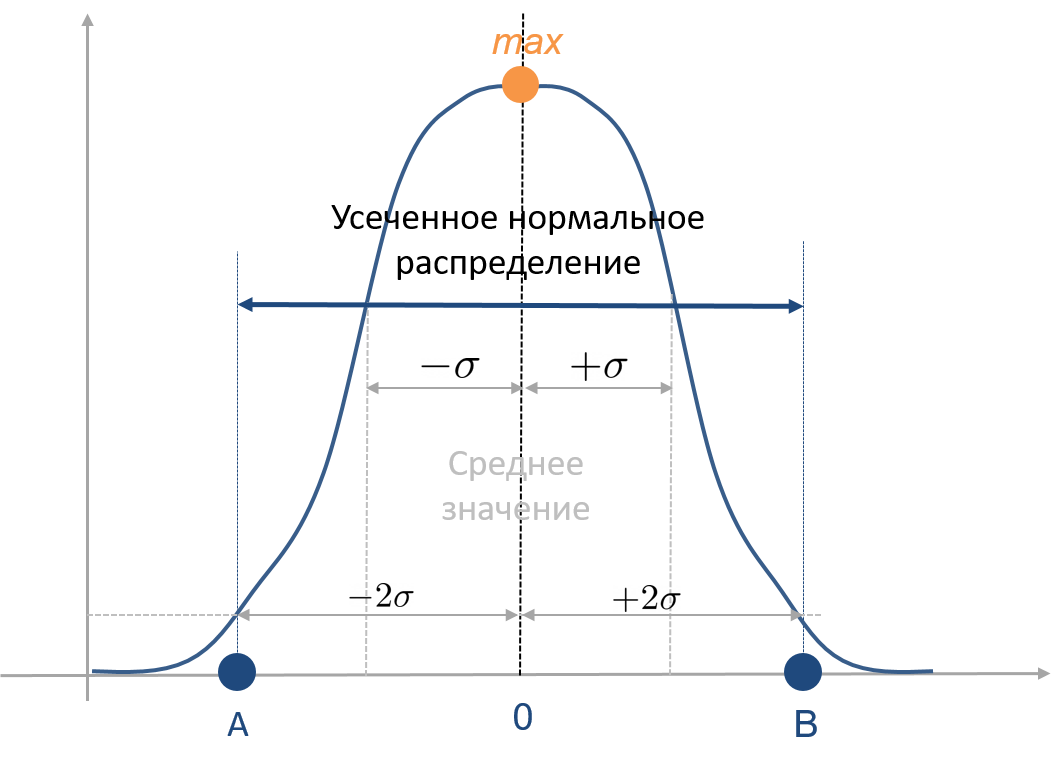

In [37]:
Image('Initialization_TruncateNormal.png')

Считается одним из самых популярных методов инициализации (LeCun)

### Общие рекоммендации к выработке схем инициализации

На сегодняшний день однозначного понимания о том, какой метод более правильный (LeCun). Существует множество авторских методов инициализации. Какие рекоммендации важно знать при инициализации весов: 
- 1. Исходные значения весов (за исключением свободных членов) должны быть близки к 0;
- 2. Равномерные или нормальные распределения весов: в нраспределении нормальных весов значения, близкие к нулю, встречаются чаще;
- 3. Интервал отсечки в третьем методе классики сравнивают с количеством нейронов в среднем слое с количеством нейронов предшествующего слоя.

--------------------------------

## Практикум 3) 

Продолжим изучение процесса обучения нейронной сети в Keras и попробуем улучшить параметры с учетом новых полученных теоретических знаний в рамках текущего занятия уже на практике: 

### Модель №2. Алгоритм управления процессом оптимизации

##### повторим все, что необходимо повторить

In [69]:
import numpy as np # 
import pandas as pd # 
import matplotlib # 
import matplotlib.pyplot as plt

In [70]:
os.chdir ("C:\\Users\\User\ML_git\\NeuralNetworks_Keras_3\Datasets_ANN_FF_Keras")

In [58]:
df = pd.read_csv('Wine.txt', sep='\t', header=0)
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [59]:
y = df['Desired1(3)'] # Задаем отклик по названию столбца
x = df.drop('Desired1(3)', axis=1) # ... а все оставшиеся столбцы соответственно будут предикторами

In [60]:
from sklearn.model_selection import train_test_split #подгружаем модуль расщепления
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12345, 
                                                   # задаем долю тестовой выборки
                                                   test_size = 0.33)

In [61]:
from sklearn.model_selection import train_test_split #подгружаем модуль расщепления
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12345, 
                                                   # задаем долю тестовой выборки
                                                   test_size = 0.33)

In [62]:
y_train_bin = np_utils.to_categorical(y_train)
y_test_bin = np_utils.to_categorical(y_test)

In [63]:
y_train_bin[0:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [64]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils 
from keras import optimizers # добавляем новый модуль

##### Построим Модель 2

In [65]:
# Уточним модель: 

model2 = Sequential()
model2.add(Dense(9, input_dim=13, activation='relu'))
model2.add(Dense(10, activation='relu' ))
model2.add(Dense(3, activation='softmax'))

##### вносим изменения

In [66]:
# Добавим новый метод оптимизации stohastic gradient descent

sgd2 = optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.8, nesterov=True) # c моментом нестерова + 
model2.compile(loss='categorical_crossentropy', optimizer=sgd2, metrics=['accuracy'])

# model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\User\anaconda3\Anaconda3 (final)\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Комментарии:_В предыдущей версии кода мы использовали ```optimizer='adam'```Параметры оптимизитора SGD ```lr=``` величина шага спуска $ \lambda $ ```decay=``` насколько эти шаги будем уменьшать ```momentum=``` ```nesterov=``` Таким образом у нас появился более детализированный оптимизатор по сравнению с адамом. Так мы управляем методом оптимизации. Теперь осталось запустить и проверить, насколько новый оптимизатор улучшил модель

##### тренируем модель

In [68]:
# Training a model
model2.fit(x_train, y_train_bin, epochs=300, batch_size=10)

Epoch 1/300
12/12 [==============================] - 1s 3ms/step - loss: 2904.2129 - accuracy: 0.4118
Epoch 2/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0919 - accuracy: 0.4118
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0873 - accuracy: 0.4118
Epoch 4/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0862 - accuracy: 0.4118
Epoch 5/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0852 - accuracy: 0.4118
Epoch 6/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0849 - accuracy: 0.4118
Epoch 7/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0854 - accuracy: 0.4118
Epoch 8/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0846 - accuracy: 0.4118
Epoch 9/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0847 - accuracy: 0.4118
Epoch 10/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0862 - accuracy: 0.4118
Epoch 

Epoch 83/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0853 - accuracy: 0.4118
Epoch 84/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0855 - accuracy: 0.4118
Epoch 85/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0849 - accuracy: 0.4118
Epoch 86/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0846 - accuracy: 0.4118
Epoch 87/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0872 - accuracy: 0.4118
Epoch 88/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0848 - accuracy: 0.4118
Epoch 89/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0847 - accuracy: 0.4118
Epoch 90/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0863 - accuracy: 0.4118
Epoch 91/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0853 - accuracy: 0.4118
Epoch 92/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.4118


12/12 [==============================] - 0s 4ms/step - loss: 1.0859 - accuracy: 0.4118
Epoch 246/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0856 - accuracy: 0.4118
Epoch 247/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0858 - accuracy: 0.4118
Epoch 248/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0842 - accuracy: 0.4118
Epoch 249/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0855 - accuracy: 0.4118
Epoch 250/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0843 - accuracy: 0.4118
Epoch 251/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0843 - accuracy: 0.4118
Epoch 252/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0840 - accuracy: 0.4118
Epoch 253/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.4118
Epoch 254/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.4118
Epoc

In [72]:
scores = model2.evaluate(x_test, y_test_bin)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 4ms/step - loss: 1.0931 - accuracy: 0.3729

Accuracy: 37.29%


In [73]:
# задаем предикторы
predictions = model.predict(x_test) 

2/2 [==============================] - 0s 9ms/step


In [74]:
# проверяем значения первых 5 строк
print(predictions[0:5])

[[5.1383521e-02 2.2525160e-04 9.4839126e-01]
 [2.1121010e-01 2.4971436e-01 5.3907549e-01]
 [6.2790990e-04 9.9931145e-01 6.0658829e-05]
 [9.7483647e-01 4.7355480e-03 2.0428004e-02]
 [2.6447403e-03 9.6946400e-01 2.7891288e-02]]


----------------------------------------------

###  Модель №3. Управление процессом инициализации. 

In [78]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
 
from keras import initializers # добавляем новый модуль

##### Подготавливаем модуль инициализации

In [85]:
# идентифтцируем модули
Изучили алгоритм управления гипперпараметром опптимизаци и писать код оптимизаци (расшифруйте атрибуты кода sgd2)= initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=12345) # среднее + станд.отклонение + зерна 

init_3 = initializers.Constant(value = 1e-3) # 

Комментарии:_```init_2``` описывает инициализацию для основного вектора весов и задает метод инициализации для свободных членов  ```init_3``` приводит значения всех свободных членов к константе и задает их размер

##### вносим изменения

In [108]:
# уточним модель 3
model3 = Sequential()
model3.add(Dense(9, input_dim=13, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model3.add(Dense(10, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros' ))
model3.add(Dense(3, activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros'))

Комментарии:_Появились новые параметры ```kernel_initializer``` инициализация основного вектора весов  ```bias_initializer``` инициализация для свободных членов

In [109]:
sgd2 = optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.8, nesterov=True) # без изменений
model3.compile(loss='categorical_crossentropy', optimizer=sgd2, metrics=['accuracy']) # без изменений

# sgd2 = optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.8, nesterov=True) # c моментом нестерова + 
# model2.compile(loss='categorical_crossentropy', optimizer=sgd2, metrics=['accuracy'])
# model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\User\anaconda3\Anaconda3 (final)\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


##### тренеруем модель

In [110]:
model3.fit(x_train, y_train_bin, epochs=300, batch_size=10)

Epoch 1/300
12/12 [==============================] - 1s 4ms/step - loss: 1.0869 - accuracy: 0.4370
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 1.1029 - accuracy: 0.3782
Epoch 3/300
12/12 [==============================] - 0s 5ms/step - loss: 1.0869 - accuracy: 0.4118
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 1.0855 - accuracy: 0.4118
Epoch 5/300
12/12 [==============================] - 0s 5ms/step - loss: 1.0859 - accuracy: 0.4118
Epoch 6/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0850 - accuracy: 0.4118
Epoch 7/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0863 - accuracy: 0.4118
Epoch 8/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0839 - accuracy: 0.4118
Epoch 9/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0854 - accuracy: 0.4118
Epoch 10/300
12/12 [==============================] - 0s 5ms/step - loss: 1.0837 - accuracy: 0.4118
Epoch 11/

12/12 [==============================] - 0s 3ms/step - loss: 1.0847 - accuracy: 0.4118
Epoch 84/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0845 - accuracy: 0.4118
Epoch 85/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0846 - accuracy: 0.4118
Epoch 86/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0847 - accuracy: 0.4118
Epoch 87/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0840 - accuracy: 0.4118
Epoch 88/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0853 - accuracy: 0.4118
Epoch 89/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.4118
Epoch 90/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0848 - accuracy: 0.4118
Epoch 91/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0847 - accuracy: 0.4118
Epoch 92/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0851 - accuracy: 0.4118
Epoch 93/300


12/12 [==============================] - 0s 3ms/step - loss: 1.0838 - accuracy: 0.4118
Epoch 246/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0864 - accuracy: 0.4118
Epoch 247/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0856 - accuracy: 0.4118
Epoch 248/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0856 - accuracy: 0.4118
Epoch 249/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0841 - accuracy: 0.4118
Epoch 250/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.4118
Epoch 251/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.4118
Epoch 252/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0853 - accuracy: 0.4118
Epoch 253/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0853 - accuracy: 0.4118
Epoch 254/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0848 - accuracy: 0.4118
Epoc

In [111]:
scores = model3.evaluate(x_test, y_test_bin)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 5ms/step - loss: 1.0941 - accuracy: 0.3729

Accuracy: 37.29%


In [94]:
predictions = model3.predict(x_test) 

2/2 [==============================] - 0s 4ms/step


In [112]:
# проверяем значения первых 5 строк
print(predictions[0:5])

[[0.31778184 0.2699785  0.41223967]
 [0.31778184 0.2699785  0.41223967]
 [0.31778184 0.2699785  0.41223967]
 [0.31778184 0.2699785  0.41223967]
 [0.31778184 0.2699785  0.41223967]]


##### Завершение занятия

В этой части мы изучили: 
- Разобрали базовые процессы (1-й итерации) алгоритма обучения нейронной сети (Перечислите основные процессы обучения 1-й итерации?)
- Основыные гипперпараметры нейросети, с которой работает ML-инжинер (Назовите их?)
- Основныем модели loss-функций и область применения (Назовите основные виды Loss-функций? Соотнесите их с задачами машинного обучения?)
- Базовые схемы инициализации нейронной сети и рекоммендации к их моделированию (Назовите основные модели инициализации основных значений весов? Назовити основные рекоммендации для инициализации свободных членов?
- Алгоритм управления гипперпараметром опптимизаци и писать код оптимизаци (расшифруйте атрибуты кода sgd2)
- Алгоритм управления гипперпараметром инициализации и вносить изменения в модель нейросети (расшифруйте атрибуты кода init_2 = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=12345; Что такое зерна инициализации и для чео они нужны?)
- Закрепили на практике алгоритмы 1-й итерации обучения нейросети на примере задачи классификации.

На следующих Занятиях мы изучим:

Теория:
- Нейронные сети в задачах прогнозирования
- 
Практика: 
- 



## Лабораторная работа № 2